In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

In [2]:
train = pd.read_csv('../datasets/train.csv', low_memory=False)
train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [4]:
test = pd.read_csv('../datasets/test.csv', low_memory=False)
test.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,David Bowie,Space Oddity - 2015 Remaster,73.0,0.310,0.403,NaN,-13.664,1,0.0326,0.07260,0.000093,0.1390,0.466,134.480,318027.000000,4
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.00040,0.000009,0.2630,0.291,151.937,220413.000000,4
2,P!nk,Raise Your Glass,78.0,0.700,0.709,7.0,-5.006,1,0.0839,0.00480,NaN,0.0289,0.625,122.019,202960.000000,4
3,Shawn Mendes,Wonder,80.0,0.333,0.637,1.0,-4.904,0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,172693.000000,4
4,Backstreet Boys,Helpless When She Smiles - Radio Version,48.0,0.393,0.849,11.0,-4.114,1,0.0459,0.00421,NaN,0.1620,0.222,74.028,4.093117,4


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         7713 non-null   object 
 1   Track Name          7713 non-null   object 
 2   Popularity          7486 non-null   float64
 3   danceability        7713 non-null   float64
 4   energy              7713 non-null   float64
 5   key                 6905 non-null   float64
 6   loudness            7713 non-null   float64
 7   mode                7713 non-null   int64  
 8   speechiness         7713 non-null   float64
 9   acousticness        7713 non-null   float64
 10  instrumentalness    5804 non-null   float64
 11  liveness            7713 non-null   float64
 12  valence             7713 non-null   float64
 13  tempo               7713 non-null   float64
 14  duration_in min/ms  7713 non-null   float64
 15  time_signature      7713 non-null   int64  
dtypes: flo

In [6]:
train['Class'].unique()

array([ 5, 10,  6,  2,  4,  8,  9,  3,  7,  1,  0], dtype=int64)

<AxesSubplot:xlabel='Class', ylabel='Count'>

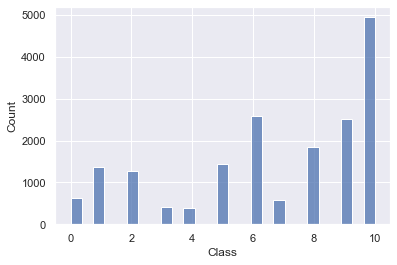

In [7]:
sns.histplot(data=train['Class'])

In [8]:
cols = list(train.columns)

In [9]:
def dist_plot(idx, cols=cols, df=train, **kwargs):
    return sns.distplot(df[cols[idx]], **kwargs)

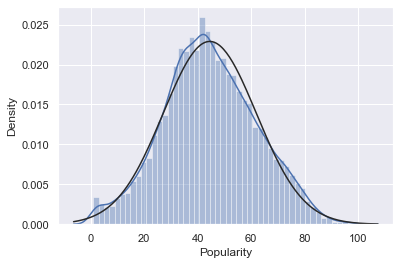

In [10]:
dist_plot(2, fit=norm);

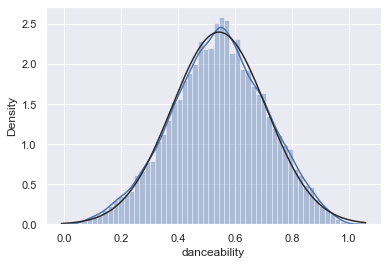

In [11]:
dist_plot(3, fit=norm);

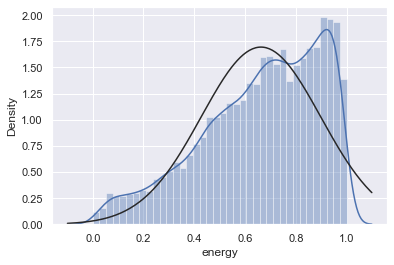

In [12]:
dist_plot(4, fit=norm);

<AxesSubplot:xlabel='loudness', ylabel='Density'>

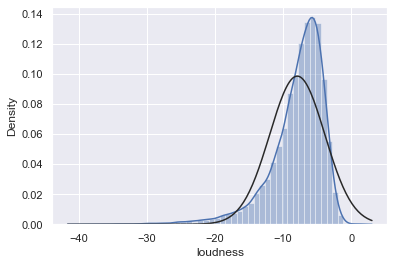

In [13]:
dist_plot(6, fit=norm)

<AxesSubplot:xlabel='speechiness', ylabel='Density'>

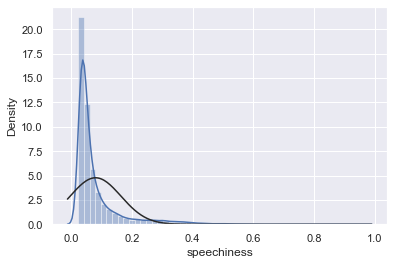

In [14]:
dist_plot(8, fit=norm)

<AxesSubplot:xlabel='acousticness', ylabel='Density'>

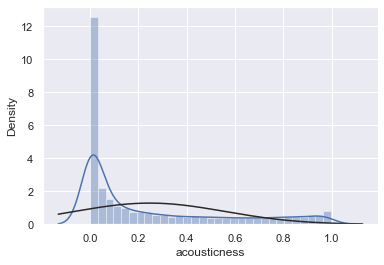

In [15]:
dist_plot(9, fit=norm)

<AxesSubplot:xlabel='instrumentalness', ylabel='Density'>

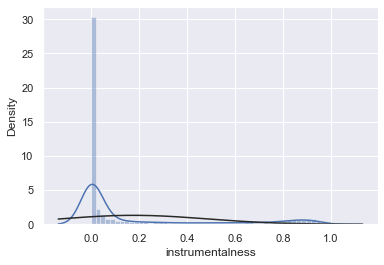

In [16]:
dist_plot(10, fit=norm)

<AxesSubplot:xlabel='liveness', ylabel='Density'>

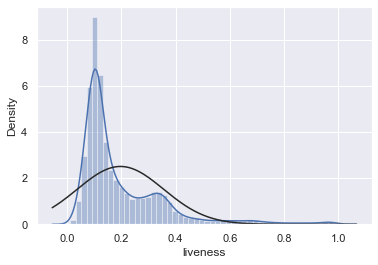

In [17]:
dist_plot(11, fit=norm)

<AxesSubplot:xlabel='valence', ylabel='Density'>

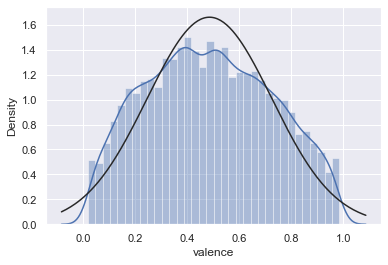

In [18]:
dist_plot(12, fit=norm)

<AxesSubplot:xlabel='tempo', ylabel='Density'>

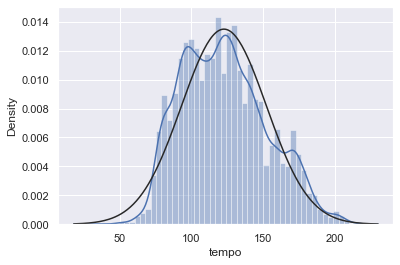

In [19]:
dist_plot(13, fit=norm)

In [20]:
train['key'].value_counts()

7.0     2097
2.0     1994
9.0     1961
1.0     1680
4.0     1549
11.0    1476
5.0     1397
6.0     1190
8.0     1119
10.0    1010
3.0      509
Name: key, dtype: int64

In [21]:
train['mode'].value_counts()

1    11459
0     6537
Name: mode, dtype: int64

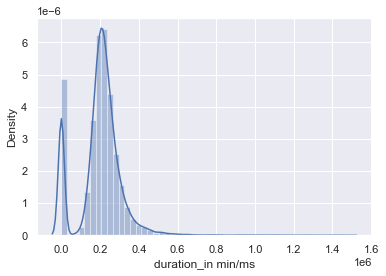

In [26]:
dist_plot(14);

In [22]:
train['duration_in min/ms'].value_counts()

192000.0    13
235000.0    12
230000.0    11
240000.0     9
220000.0     9
            ..
194533.0     1
180451.0     1
173107.0     1
383160.0     1
258707.0     1
Name: duration_in min/ms, Length: 14121, dtype: int64

In [23]:
train['time_signature'].value_counts()

4    16451
3     1228
5      203
1      114
Name: time_signature, dtype: int64